# Ingeniería de variables

## Correlación entre las variables

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# cargar los datos
# cargaremos los datos de un archivo csv
# Este archivo debe estar en la misma carpeta del notebook.
# Si se encuentra en otra carpeta podemos especificar la ruta.
data=pd.read_csv('titanic_train.csv')


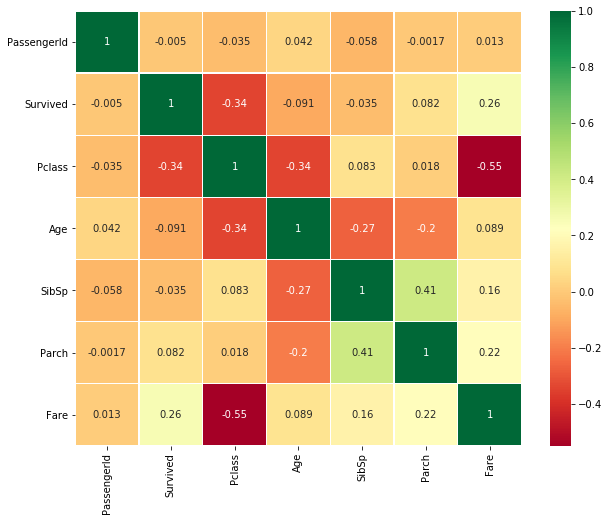

In [135]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Interpretemos el mapa de calor.

## Imputación e interacción

## Age
La variable Age tiene muchos nulos, intentemos rellenarlos utilizando los nombres 

Extraigamos los prefijos de los nombres

In [157]:
data['Name'].sample(5)

673                  Wilhelms, Mr. Charles
595            Van Impe, Mr. Jean Baptiste
184    Kink-Heilmann, Miss. Luise Gretchen
442              Petterson, Mr. Johan Emil
593                     Bourke, Miss. Mary
Name: Name, dtype: object

In [91]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [92]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [93]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [94]:
# chequemos la edad promedio por inicial
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [97]:
# Rellenemos los nulos
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [98]:
# revisemos si quedan nulos
data.Age.isnull().any() #So no null values left finally 

False

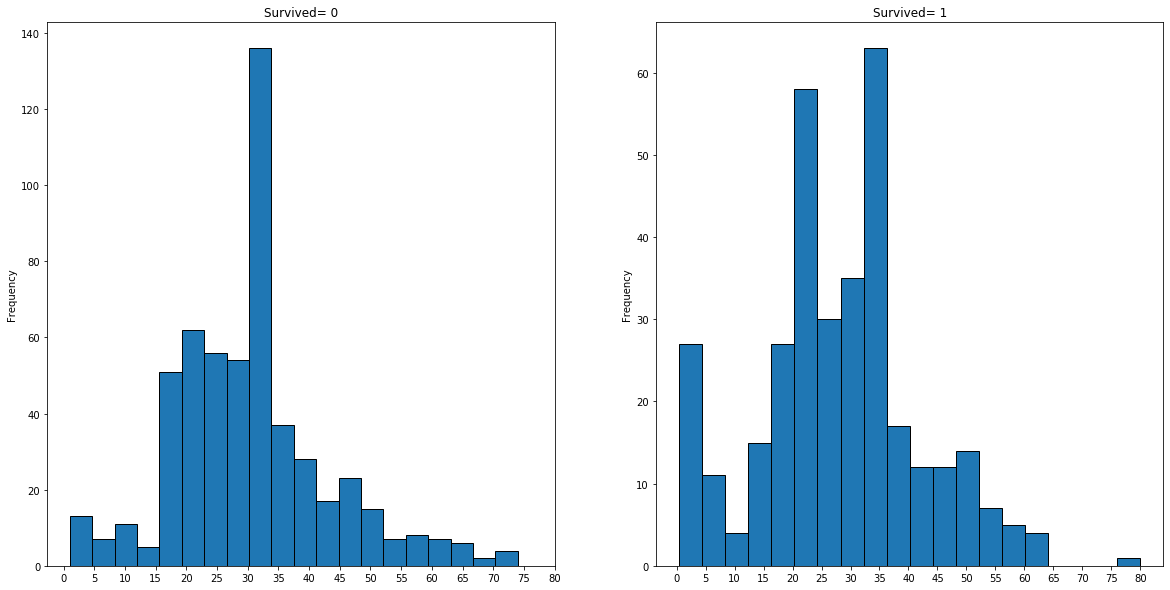

In [100]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Rellenando nulos en `Embarked`
La mayoría de los pasajeros abordaron desde el puerto **S**, podemos reemplazar los nulos con **S**.

In [110]:
data['Embarked'].fillna('S',inplace=True)

In [111]:
data.Embarked.isnull().any()# Finally No NaN values

False

In [143]:
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## Creando una variable Family_Size
Reemplacemos `Parch`y `SibSp`con una variable `Family_Size` que nos diga el tamaño de la familia.

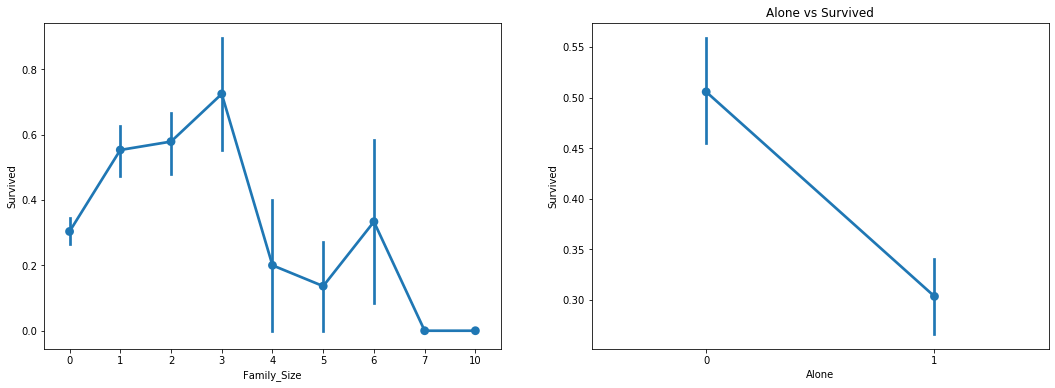

In [149]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',kind='point',data=data,ax=ax[0])
sns.pointplot(x='Alone',y='Survived',kind='point', data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()